# Basic Time Series Models - Lab

## Introduction

Now that you have some basic understanding of the white noise and random walk models, its time for you to implement them! 

## Objectives

In this lab you will: 

- Generate and analyze a white noise model 
- Generate and analyze a random walk model 
- Implement differencing in a random walk model 


## A White Noise model

To get a good sense of how a model works, it is always a good idea to generate a process. Let's consider the following example:
- Every day in August, September, and October of 2018, Nina takes the subway to work. Let's ignore weekends for now and assume that Nina works every day 
- We know that on average, it takes her 25 minutes, and the standard deviation is 4 minutes  
- Create and visualize a time series that reflects this information 

Let's import `pandas`, `numpy`, and `matplotlib.pyplot` using their standard alias. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Do not change this seed
np.random.seed(12) 

Create the dates. You can do this using the `date_range()` function Pandas. More info [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html).

In [3]:
# Create dates
dates = pd.date_range('2018-08-01', '2018-10-31', freq='D')
dates

DatetimeIndex(['2018-08-01', '2018-08-02', '2018-08-03', '2018-08-04',
               '2018-08-05', '2018-08-06', '2018-08-07', '2018-08-08',
               '2018-08-09', '2018-08-10', '2018-08-11', '2018-08-12',
               '2018-08-13', '2018-08-14', '2018-08-15', '2018-08-16',
               '2018-08-17', '2018-08-18', '2018-08-19', '2018-08-20',
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-25', '2018-08-26', '2018-08-27', '2018-08-28',
               '2018-08-29', '2018-08-30', '2018-08-31', '2018-09-01',
               '2018-09-02', '2018-09-03', '2018-09-04', '2018-09-05',
               '2018-09-06', '2018-09-07', '2018-09-08', '2018-09-09',
               '2018-09-10', '2018-09-11', '2018-09-12', '2018-09-13',
               '2018-09-14', '2018-09-15', '2018-09-16', '2018-09-17',
               '2018-09-18', '2018-09-19', '2018-09-20', '2018-09-21',
               '2018-09-22', '2018-09-23', '2018-09-24', '2018-09-25',
      

Generate the values for the white noise process representing Nina's commute in August and September.

In [7]:
plt.style.use('ggplot')
from jupyterthemes import jtplot
jtplot.style()

(array([ 1.,  1.,  3., 17., 17., 20., 18., 10.,  3.,  2.]),
 array([14.58001435, 16.6353424 , 18.69067045, 20.7459985 , 22.80132655,
        24.8566546 , 26.91198265, 28.9673107 , 31.02263875, 33.0779668 ,
        35.13329485]),
 <a list of 10 Patch objects>)

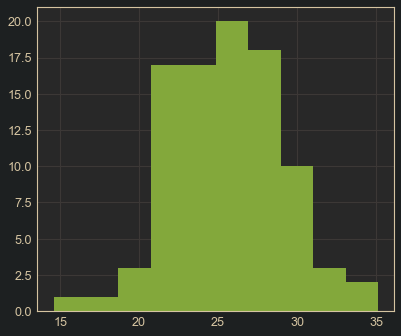

In [8]:
# Generate values for white noise
commute = np.random.normal(25, 4, len(dates))
plt.hist(commute)

Create a time series with the dates and the commute times.

In [10]:
# Create a time series
commute_series = pd.DataFrame(commute, index=dates, columns=['commute_time'])
commute_series.head()

,commute_time
2018-08-01,25.221352
2018-08-02,25.871523
2018-08-03,27.582299
2018-08-04,24.366956
2018-08-05,23.044716


Visualize the time series and set appropriate axis labels.

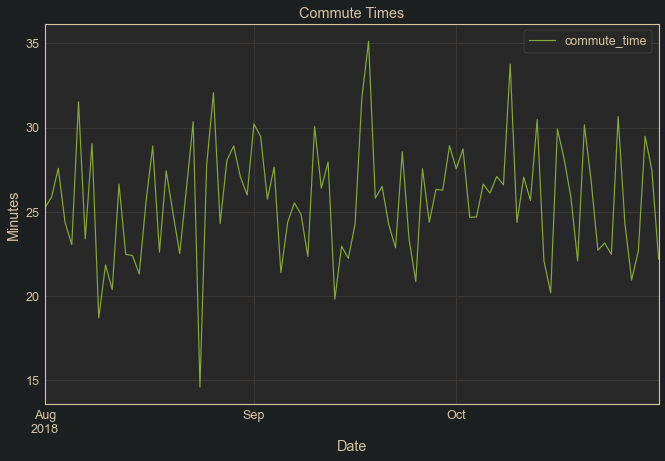

In [15]:
# Visualize the time series 
commute_series.plot(title='Commute Times', figsize=(11,7))
plt.xlabel('Date')
plt.ylabel('Minutes');

Print Nina's shortest and longest commute.

In [18]:
# Shortest commute
print("Shortest Commute: {} minutes".format(commute_series.commute_time.min()))

Shortest Commute: 14.580014353895908 minutes


In [19]:
# Longest commute
print("Longest Commute: {} minutes".format(commute_series.commute_time.max()))

Longest Commute: 35.133294851109824 minutes


Look at the distribution of commute times.

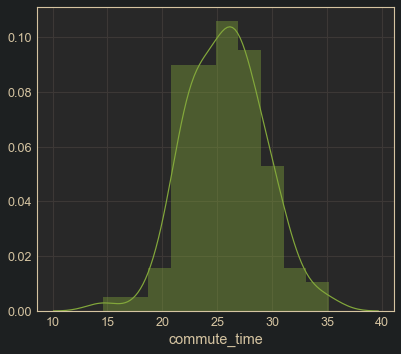

In [21]:
# Distribution of commute times
import seaborn as sns
sns.distplot(commute_series.commute_time)

Compute the mean and standard deviation of `commute_series`. The fact that the mean and standard error are constant over time is crucial!

In [22]:
# Mean of commute_series
print("Mean of Commute Times: {} minutes".format(commute_series.commute_time.mean()))

Mean of Commute Times: 25.691490917726536 minutes


In [23]:
# Standard deviation of commute_series
print("St dev of Commute Times: {} minutes".format(commute_series.commute_time.std()))

St dev of Commute Times: 3.4898299420002057 minutes


Now, let's look at the mean and standard deviation for August and October.  

In [26]:
# Mean and standard deviation for August and October
august = commute_series['2018-08']
october = commute_series['2018-10']
print("Mean for August: {} minutes\nStd for August: {} minutes".format(august.commute_time.mean(), 
                                                                       august.commute_time.std()))
print("Mean for Octover: {} minutes\nStd for October: {} minutes".format(october.commute_time.mean(),
                                                                         october.commute_time.std()
                                                                        ))

Mean for August: 25.20013022095006 minutes
Std for August: 3.79997245795319 minutes
Mean for Octover: 25.95910229190526 minutes
Std for October: 3.284045582144323 minutes


Because you've generated this data, you know that the mean and standard deviation will be the same over time. However, comparing mean and standard deviation over time is useful practice for real data examples to check if a process is white noise!

## A Random Walk model 

Recall that a random walk model has: 

- No specified mean or variance 
- A strong dependence over time 

Mathematically, this can be written as:

$$Y_t = Y_{t-1} + \epsilon_t$$

Because today's value depends on yesterday's, you need a starting value when you start off your time series. In practice, this is what the first few time series values look like:
$$ Y_0 = \text{some specified starting value}$$
$$Y_1= Y_{0}+ \epsilon_1 $$
$$Y_2= Y_{1}+ \epsilon_2 = Y_{0} + \epsilon_1 + \epsilon_2  $$
$$Y_3= Y_{2}+ \epsilon_3 = Y_{0} + \epsilon_1 + \epsilon_2 + \epsilon_3 $$
$$\ldots $$

Keeping this in mind, let's create a random walk model: 

Starting from a value of 1000 USD of a share value upon a company's first IPO (initial public offering) on January 1 2010 until end of November of the same year, generate a random walk model with a white noise error term, which has a standard deviation of 10.

In [37]:
# Keep the random seed
np.random.seed(11)

# Create a series with the specified dates
dates = pd.date_range('2010-01-01', '2010-11-30')

# White noise error term
error = np.random.normal(0, 10, len(dates)-1)

# Define random walk
def random_walk(start, error):        
    values = [start]
    
    for i, err in enumerate(error):
        values.append(start + sum(error[:i+1]))
        
    return values

shares_value = random_walk(1000, error)

shares_series = pd.Series(shares_value, index=dates)

Visualize the time series with correct axis labels. 

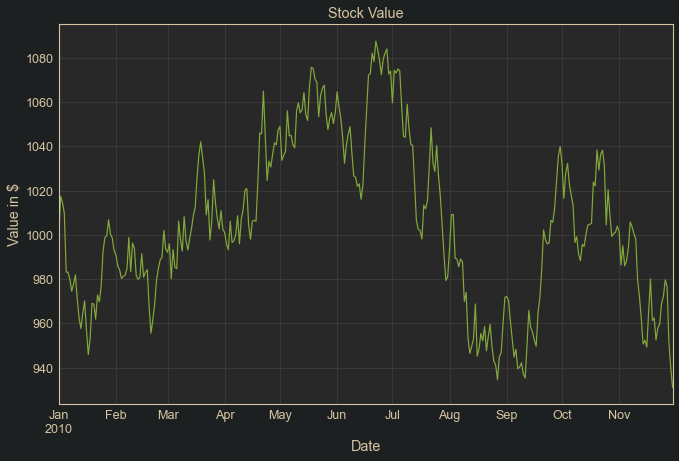

In [39]:
# Your code here
shares_series.plot(title='Stock Value', figsize=(11,7))
plt.xlabel('Date')
plt.ylabel('Value in $');

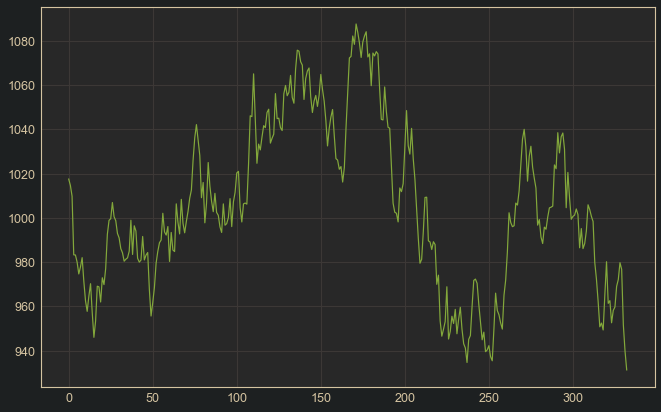

In [44]:
plt.figure(figsize=(11,7))
plt.plot(np.cumsum(error) + 1000)

You can see how this very much looks like the exchange rate series you looked at in the lesson!

## Random Walk with a Drift

Repeat the above, but include a drift parameter $c$ of 8 now!

In [49]:
# Keep the random seed
np.random.seed(11)

# Create a series with the specified dates
dates = pd.date_range('2010-01-01', '2010-11-30')

# White noise error term
error = np.random.normal(0, 10, len(dates)-1)

def random_walk(start, error, c=8):        
    cs = np.full(shape=error.shape, fill_value=8)
    values = [start] + list(np.cumsum(error) + np.cumsum(cs) + start)
    
    return values

shares_value_drift = random_walk(1000, error)

shares_series_drift = pd.Series(shares_value_drift, index=dates)

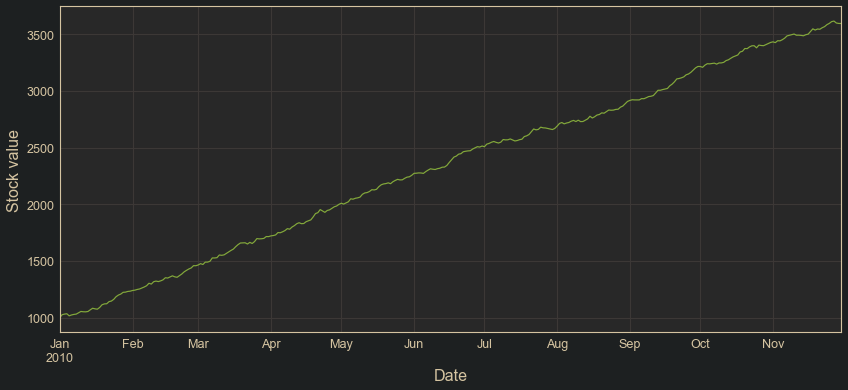

In [50]:
ax = shares_series_drift.plot(figsize=(14,6))
ax.set_ylabel('Stock value', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
plt.show()

Note that there is a very strong drift here!

## Differencing in a Random Walk model

One important property of the random walk model is that a differenced random walk returns a white noise. This is a result of the mathematical formula:

$$Y_t = Y_{t-1} + \epsilon_t$$
which is equivalent to
$$Y_t - Y_{t-1} = \epsilon_t$$

and we know that $\epsilon_t$ is a mean-zero white noise process! 

Plot the differenced time series (time period of 1) for the shares time series (no drift).

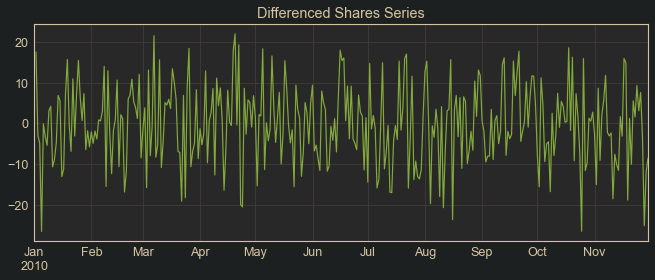

In [53]:
# Your code here
shares_series_diff = shares_series.diff()
shares_series_diff.plot(title='Differenced Shares Series', figsize=(11,4))

This does look a lot like a white noise series!

Plot the differenced time series for the shares time series (with a drift).

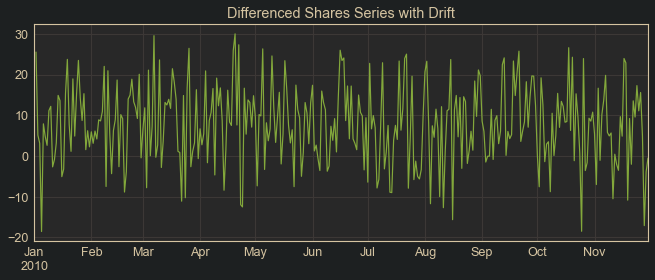

In [54]:
# Your code here 
shares_series_drift.diff().plot(title='Differenced Shares Series with Drift',
                                figsize=(11,4)
                               )

This is also a white noise series, but what can you tell about the mean? 

The mean is equal to the drift $c$, so 8 for this example!

## Summary

Great, you now know how white noise and random walk models work!